---
title: Gradient Descent Blog
author: Dean Smith
date: '2023-4-7'
image: "image.jpg"
description: "In this blog I build and implement a classification model using gradient descent"
format: html
---

# Gradient Descent

Here, I retrieve my data set be importing it through one of sklearn's datasets. The data set chosen has two features (feature 1 and feature 2) which are displayed in the graph shown after running the code cell below. Additionally, I have also imported my logisticRegression source code which can be found using the following link: https://github.com/dmsmith25/dmsmith25.github.io/blob/7eeef82cbf16398e0d0e9900e31df7dd50b99e12/posts/gradient-descent-project/logisticRegression.py

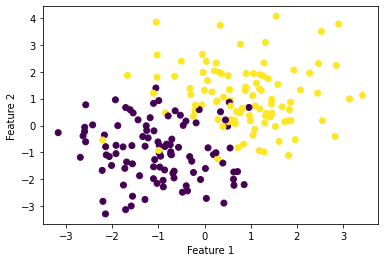

In [143]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
from logisticRegression import LogisticRegression

np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In the code cell below, I initialize my logisticRegression instance LR using my imported source code. Then, I fit my logisticRegression model to my dataset. In my source code, the fit function uses gradient descent to adjust the weight of the logisticRegression model to accurately classify points from the dataset.

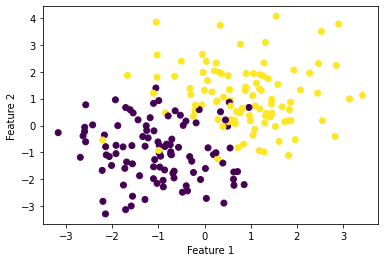

In [144]:
LR = LogisticRegression()

LR.fit(X, y, alpha=0.1, max_epochs=1000)

# inspect the fitted value of w for LR
LR.w 

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

To see the performance of the logisticRegression model, the code cell below shows the line formed from the weights of the now fitted model and the emperical risk with respect to iterations in the fitting phase. 

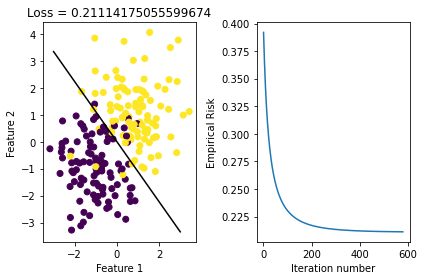

In [145]:
loss = LR.prev_loss

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (-f1*LR.w[0])/LR.w[1], color = "black")

num_steps = len(LR.loss_history)
axarr[1].plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

#axarr[1].plot(LRS.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

Finally, I introduce a modified form of gradient descent called stochastic gradient descent. In stochastic gradient descent, my model does not calculate the full gradient and instead calculates the gradient of batches of my dataset. Visually, the chart below shows the loss with respect to iterations between gradient descent and stochastic gradient descent.

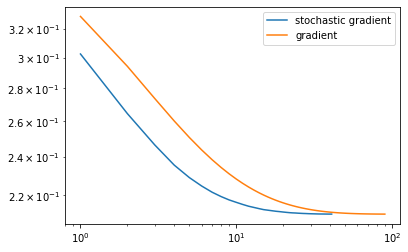

In [148]:
LRS = LogisticRegression()
LRS.fit_stochastic(X, y, 
                  m_epochs = 1000,  
                  batch_size = 10, 
                  alpha = 0.1)

num_steps = len(LRS.loss_history)
plt.plot(np.arange(num_steps) + 1, LRS.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, 
                  max_epochs = 1000,
                  alpha = 1.0)
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 